In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

DATASET_PATH = '.' 
TRAIN_DIR = os.path.join(DATASET_PATH, 'Training')
TEST_DIR = os.path.join(DATASET_PATH, 'Testing')

IMG_SIZE = (100, 100) 
BATCH_SIZE = 64 

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    train_generator,
    epochs=8,
    validation_data=test_generator
)

print("Done! Model trained.")

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 64s 683ms/step - accuracy: 0.7292 - loss: 0.6815 - val_accuracy: 0.8002 - val_loss: 0.5016
Epoch 2/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 26s 290ms/step - accuracy: 0.8734 - loss: 0.3512 - val_accuracy: 0.8230 - val_loss: 0.4295
Epoch 3/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 281ms/step - accuracy: 0.9097 - loss: 0.2543 - val_accuracy: 0.8871 - val_loss: 0.2988
Epoch 4/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 307ms/step - accuracy: 0.9477 - loss: 0.1581 - val_accuracy: 0.9108 - val_loss: 0.2329
Epoch 5/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 26s 285ms/step - accuracy: 0.9610 - loss: 0.1190 - val_accuracy: 0.9375 - val_loss: 0.1756
Epoch 6/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 279ms/step - accuracy: 0.9778 - loss: 0.0743 - val_accuracy: 0.9420 - val_loss: 0.1836
Epoch 7/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 274ms/step - accuracy: 0.9867 - loss: 0.0527 - val_accuracy: 0.9321 - val_loss: 0.1845
Epoch 8/8
90/90 ━━━━

Evaluating model on Test Set...
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.9558 - loss: 0.1697

✅ Final Test Accuracy: 95.58%


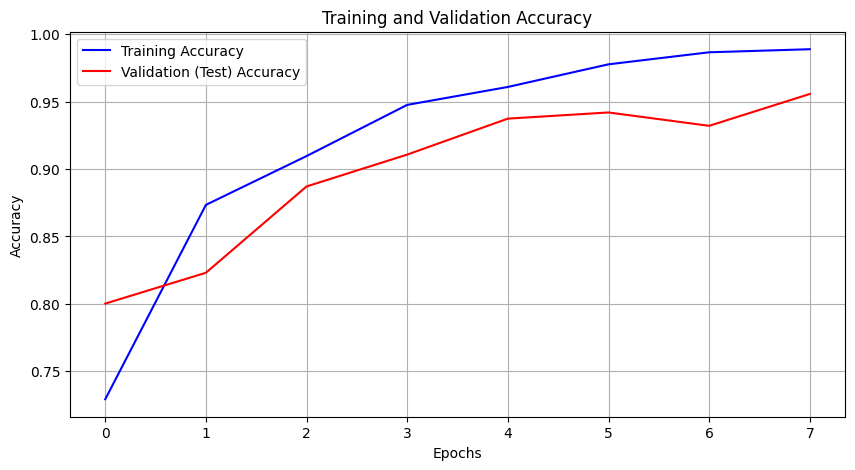

In [5]:
import matplotlib.pyplot as plt

print("Evaluating model on Test Set...")
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Final Test Accuracy: {test_acc * 100:.2f}%")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation (Test) Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Generating predictions... (this might take a few seconds)
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step

--- Confusion Matrix ---


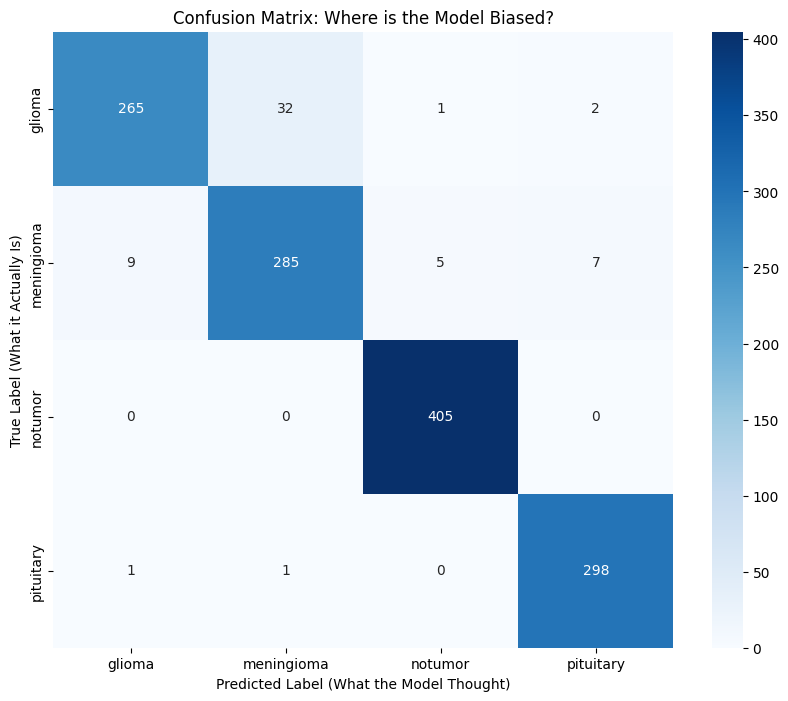


--- Classification Report ---
              precision    recall  f1-score   support

      glioma       0.96      0.88      0.92       300
  meningioma       0.90      0.93      0.91       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.97      0.99      0.98       300

    accuracy                           0.96      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.96      0.96      0.96      1311



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

test_generator.reset()

print("Generating predictions... (this might take a few seconds)")
Y_pred = model.predict(test_generator, verbose=1)

# Convert probabilities to class integers (0, 1, 2, 3)
y_pred = np.argmax(Y_pred, axis=1)

y_true = test_generator.classes

class_names = list(test_generator.class_indices.keys())

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label (What the Model Thought)')
plt.ylabel('True Label (What it Actually Is)')
plt.title('Confusion Matrix: Where is the Model Biased?')
plt.show()

print("\n--- Classification Report ---")
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)